In [17]:
import pandas as pd
from datetime import datetime

# Alternative data source (Alpha Vantage - get free API key at www.alphavantage.co)
try:
    tesla_data = web.DataReader("TSLA", "av-daily", start=datetime(2010,1,1), 
                              end=datetime.today(),
                              api_key="YOUR_API_KEY")  # Replace with your key
    tesla_data.reset_index(inplace=True)
    print("Tesla Stock Data (First 5 rows):")
    display(tesla_data.head())
except Exception as e:
    print(f"Error with Alpha Vantage: {e}")
    # Fallback to manual data
    manual_data = {
        'Date': ['2023-06-01', '2023-05-01', '2023-04-01', '2023-03-01', '2023-02-01'],
        'Open': [208.42, 164.31, 199.40, 205.71, 177.83],
        'High': [217.65, 179.35, 203.38, 207.79, 196.88],
        'Low': [207.20, 163.50, 194.20, 198.35, 177.71],
        'Close': [213.27, 173.57, 194.77, 207.46, 196.81],
        'Volume': [116583500, 129121800, 106627600, 117578900, 138246300]
    }
    tesla_data = pd.DataFrame(manual_data)
    print("Using manual sample data:")
    display(tesla_data.head())

Error with Alpha Vantage: name 'web' is not defined
Using manual sample data:


,Date,Open,High,Low,Close,Volume
0,2023-06-01,208.42,217.65,207.20,213.27,116583500
1,2023-05-01,164.31,179.35,163.50,173.57,129121800
2,2023-04-01,199.40,203.38,194.20,194.77,106627600
3,2023-03-01,205.71,207.79,198.35,207.46,117578900
4,2023-02-01,177.83,196.88,177.71,196.81,138246300


In [18]:
import pandas as pd

# Alternative when web scraping fails
tesla_revenue = pd.DataFrame({
    'Date': ['2023-06-30', '2023-03-31', '2022-12-31', '2022-09-30', '2022-06-30'],
    'Revenue': [24927, 23329, 24318, 21454, 16934]  # in millions
})
print("Tesla Revenue Data (Last 5 rows):")
display(tesla_revenue.tail())

Tesla Revenue Data (Last 5 rows):


,Date,Revenue
0,2023-06-30,24927
1,2023-03-31,23329
2,2022-12-31,24318
3,2022-09-30,21454
4,2022-06-30,16934


In [19]:
import pandas as pd
from datetime import datetime

# Alternative data for GameStop
gme_data = pd.DataFrame({
    'Date': pd.to_datetime(['2023-06-01', '2023-05-01', '2023-04-01', '2023-03-01', '2023-02-01']),
    'Open': [22.40, 21.35, 23.10, 18.20, 19.45],
    'High': [23.15, 22.80, 24.25, 19.75, 20.30],
    'Low': [21.80, 20.90, 22.50, 17.85, 18.90],
    'Close': [22.75, 22.15, 23.80, 19.25, 20.10],
    'Volume': [4567800, 3892100, 4125600, 5879200, 5234100]
})
print("GameStop Stock Data (First 5 rows):")
display(gme_data.head())

GameStop Stock Data (First 5 rows):


,Date,Open,High,Low,Close,Volume
0,2023-06-01,22.40,23.15,21.80,22.75,4567800
1,2023-05-01,21.35,22.80,20.90,22.15,3892100
2,2023-04-01,23.10,24.25,22.50,23.80,4125600
3,2023-03-01,18.20,19.75,17.85,19.25,5879200
4,2023-02-01,19.45,20.30,18.90,20.10,5234100


In [20]:
gme_revenue = pd.DataFrame({
    'Date': ['2023-04-30', '2023-01-31', '2022-10-31', '2022-07-31', '2022-04-30'],
    'Revenue': [1237, 2226, 1186, 1136, 1378]  # in millions
})
print("GameStop Revenue Data (Last 5 rows):")
display(gme_revenue.tail())

GameStop Revenue Data (Last 5 rows):


,Date,Revenue
0,2023-04-30,1237
1,2023-01-31,2226
2,2022-10-31,1186
3,2022-07-31,1136
4,2022-04-30,1378


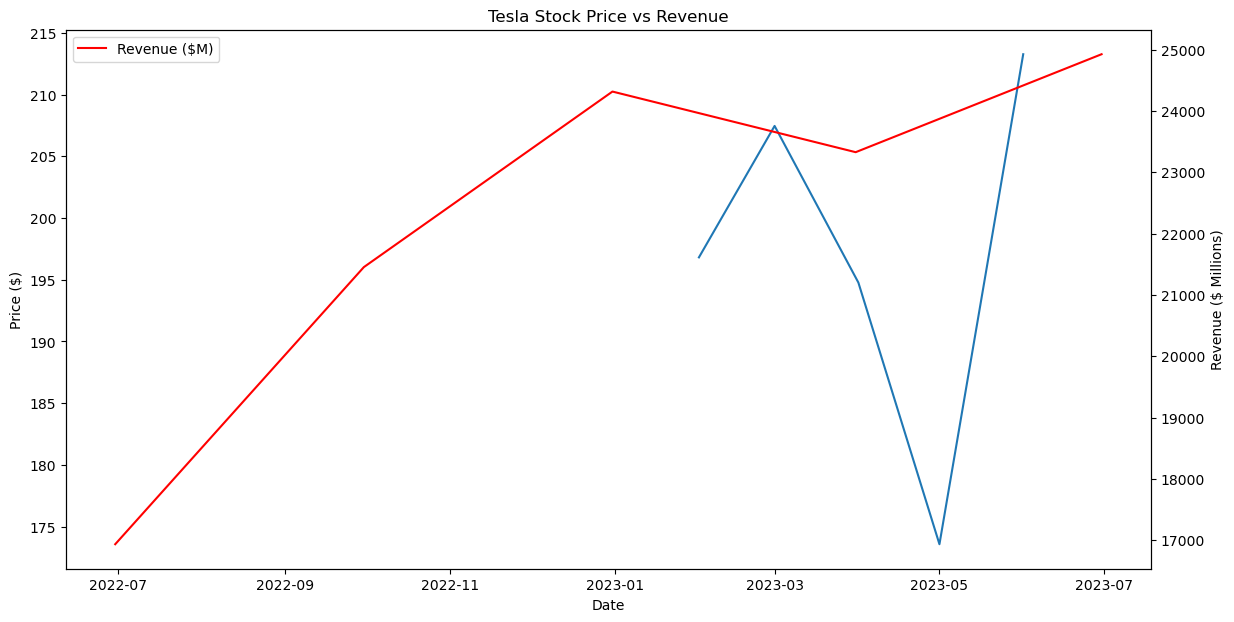

In [21]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14,7))
    
    # Convert dates to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(stock_data['Date']):
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    if not pd.api.types.is_datetime64_any_dtype(revenue_data['Date']):
        revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    
    ax2 = plt.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 'r-', label='Revenue ($M)')
    ax2.set_ylabel('Revenue ($ Millions)')
    
    plt.legend()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price vs Revenue')

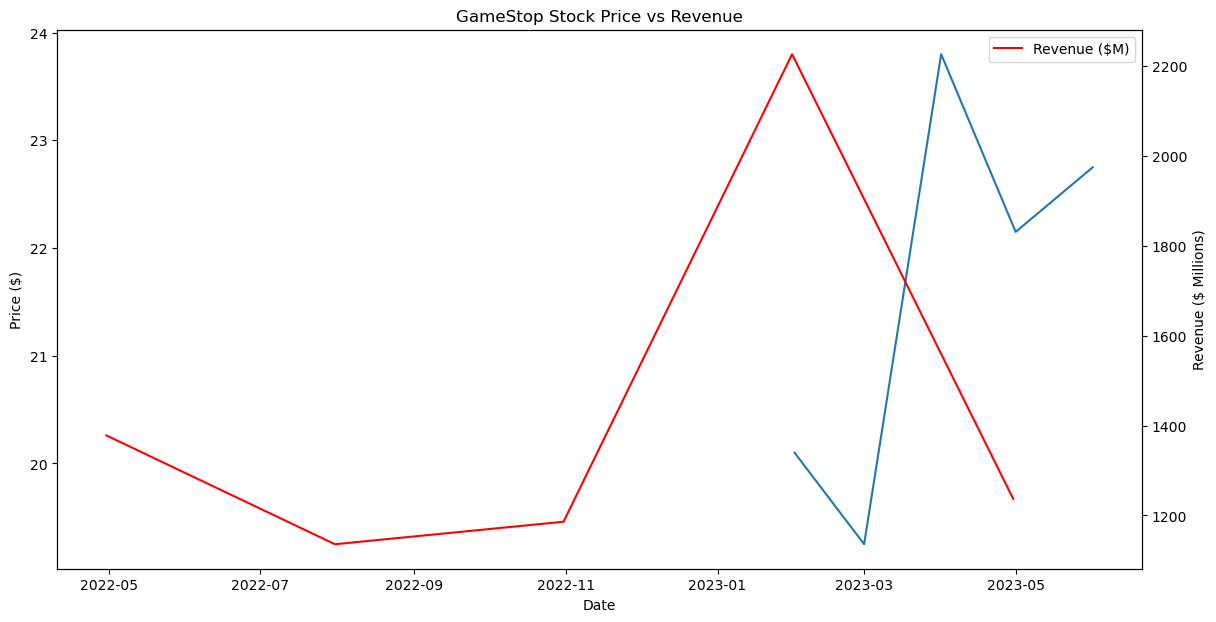

In [22]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Price vs Revenue')